## Project 1 - Part 1

## <em> Fisher Information Matrix</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

<span style="color:blue"><i> Write your partner's name here (if you have one). </i></span> <br>

***
### Link Okpy

In [ ]:
from client.api.notebook import Notebook
ok = Notebook('project1_p1_U.ok')
_ = ok.auth(inline = True)

### Imports

In [1]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

***

#### Problem 1 - Constraining the cosmological parameters using the Planck power spectrum

<i>Planck</i> is the third-generation space telescope, following COBE and WMAP, and it aims to determine the geometry and content of the Universe by observing the cosmic microwave background radiation (CMB), emitted around 380,000 years after the Big Bang. Permeating the whole universe and containing information on the properties of the early Universe, the CMB is widely known as the strongest evidence for the Big Bang model. <br><br>
Measuring the spectrum of the CMB, we confirm that it is very close to the radiation from an ideal blackbody, and flunctuations in the spectrum are very small. Averaging ocer all locations, its mean temperature is $2.725K$, and its root mean square temperature fluctuation is $\langle(\frac{\delta T}{T})^2\rangle^{1/2} = 1.1 \times 10^{-5}$ (i.e. the temperature of the CMB varies by only ~ 30 $\mu K$ across the sky). <br>
![alt text](Planck.png "Title")
<br>
Suppose you observe the fluctuations $\delta T/T$. Since we are taking measurements on the surface of a sphere, it is useful to expand $\delta T/T$ in spherical harmonics (because they form a complete set of orthogonal functions on the sphere):<br>
$$ \frac{\delta T}{T} (\theta, \phi) = \sum_{l = 0}^{\infty} \sum_{m = -l}^{l} \mathrm{a}_{lm} \mathrm{Y}_{lm} (\theta, \phi) $$
<br>
In flat space, we can do a Fourier transform of a function $f(x)$ as $\sum_k \mathrm{a}_k \mathrm{e}^{ikx}$ where $k$ is the wavenumber, and $|\mathrm{a}_k|$ determines the amplitude of the mode. For spherical harmonics, instead of $k$, we have $l$, the number of the modes along a meridian, and $m$, the number of modes along the equator. So $l$ and $m$ determine the wavelength ($\lambda = 2\pi/l$) and shape of the mode, respectively.
<br><br>
In cosmology, we are mostly interested in learning the statistical properties of this map and how different physical effects influence different physical scales, so it is useful to define the correlation function $C(\theta)$ and split the CMB map into different scales. 
<br><br>
Suppose that we observe $\delta T/T$ at two different points on the sky. Relative to an observer, they are in direction $\hat{n}$ and $\hat{n}'$ and are separated by an angle $\theta$ given by $cos\theta = \hat{n} \cdot \hat{n}'$ Then, we can find the correlation function by multiplying together the values of $\delta T/T$ at the two points and average the product over all points separated by the angle $\theta$.
$$ C(\theta)^{TT} =  \Big\langle \frac{\delta T}{T}(\hat{n})\frac{\delta T}{T}(\hat{n}') \Big\rangle_{\hat{n} \cdot \hat{n}' = cos\theta}$$
<br><br>
The above expression is specific to the temperature fluctuations, but we can also do a similar analysis for the polarization map of the CMB. (The CMB is polarized because it was scattered off of free electrons during decoupling.) We decompose the polarization pattern in the sky into a curl-free "E-mode" and grad-free "B-mode." 
<br><br>
However, the CMB measurements (limited by the experiment resolution and the patch of sky examined) tell us about $C(\theta)$ over only a limited range of angular scales. (i.e. the precise values of $C(\theta)$ for all angles from $\theta = 0$ to $\theta = 180^\circ$ is not known.) Hence, using the expansion of $\delta T/T$ in spherical harmonics, we write the correlation function as:
$$ C(\theta) = \frac{1}{4\pi}\sum_{l=0}^\infty (2l+1) C_l P_l(cos\theta) $$
where $P_l$ are the Legendre polynomials.
<br><br>
So we break down the correlation function into its multipole moments $C_l$, which is the angular power spectrum of the CMB.
![alt text](multipoles.png "Title")
<br><br>
Remember that $\lambda = 2\pi/l$. So $C_l$ measures the amplitude as a function of wavelength. ($C_l = \frac{1}{2l+1}\sum_{m = -l}^l |\mathrm{a}_{lm}|^2$). In this problem, we will consider the temperature power spectrum $C_l^{TT}$, the E-mode power spectrum $C_l^{EE} = \frac{1}{2l+1}\sum_{m = -l}^l |\mathrm{a}_{lm}^E|^2$, and the temperature-polarization cross-correlation $C_l^{TE} = \frac{1}{2l+1}\sum_{m = -l}^l \mathrm{a}_{lm}^{T*} \mathrm{a}_{lm}^E$. 
<br><br>
THe CMB angular power spectrum is usually expressed in terms of $D_l = l(l+1)C_l/2\pi$ (in unit of $\mu K^2$) because this better shows the contribution toward the variance of the temperature fluctuations.
<br><br>
Cosmologists built a software called "cosmological boltzmann code" which computes the theoretical power spectrum given cosmological parameters, such as the Hubble constant and the baryon density. Therefore, we can fit the theory power spectrum to the measured one in order to obtain the best-fit parameters.
<br><br>
Here, we consider six selected cosmological parameters, $\vec{\theta} = [\theta_1, \theta_2, ..., \theta_6] = [H_0, \Omega_b h^2, \Omega_c h^2, n_s, A_s, \tau]$. ($H_0$ = Hubble constant, $\Omega_b h^2$ = physical baryon density parameter, $\Omega_c h^2$ = physical cold dark matter density parameter, $n_s$ = scalar spectral index, $A_s$ = curvature fluctuation amplitude, $\tau$ = reionization optical depth.). We provide you with the measured CMB power spectra from Planck Data Release 2.
<br><br>
<i>References</i> :
<br>
Intro to Cosmology, Barbara Ryden
<br>
http://folk.uio.no/hke/AST5220/v11/AST5220_2_2011.pdf
<br>
http://cosmology.berkeley.edu/~yuki/CMBpol/

***

#### Problem - Fisher prediction for future CMB surveys

In class, we learned that the Fisher information matrix is useful for designing an experiment; we can vary the experiment design and predict the level of the expected error on any given parameter. In this problem, we aim to determine how well a low-noise, high-resolution future CMB survey would do in constraining the cosmological parameters.
<br><br>
The Fisher matrix is defined as the ensemble average of the Hessian of the log-likelihood ($\ln\mathcal{L}$) with respect to the given parameters $\vec{\theta}$:
<br><br>
$$ F_{ij} = -\left\langle\frac{\partial^{2}\ln\mathcal{L}}{\partial\theta_i\ \partial\theta_j}\right\rangle $$
<br><br>
Here we take the model CMB power spectrum as our observables. (Here we consider the auto-correlations $D_l^{TT}, D_l^{EE}$ and cross-correlation $D_l^{TE}$ obtained from the boltzmann code using the best-fit cosmological parameters from Planck, https://arxiv.org/pdf/1502.01589v3.pdf.) Then, we can estimate the Fisher matrix between two parameters $\theta_i$ and $\theta_j$ as:
<br><br>
$$ F_{ij} = \sum_{l} \sum_{k}\frac{1}{(\sigma_l^k)^2}\frac{\partial D^{k}_{\ell}}{\partial\theta_i}\frac{\partial D^{k}_{\ell}}{\partial\theta_j} $$
<br><br>
where we sum over the CMB auto- and cross-power spectra $D_l^k = [D_l^{0}, D_l^{1}, D_l^{2}] = [D_l^{TT}, D_l^{EE}, D_l^{TE}]$, and we assume that there is no correlation between them. $\sigma^2$ is the variance of $D_l$ and noise:
<br><br>
$$ (\sigma_l^k)^2 = \frac{2}{(2l+1) \cdot f_{sky} \cdot \Delta l}(D_l^k + N_l^k)^2 $$
<br><br>
In Part 1 and 2, we provide you with the model power spectra ($D_l$), its derivative with respect to the parameter $\theta$ ($\frac{\partial D_l}{\partial\theta}$), and the measurement error $\sigma_l$ for the current Planck survey. In Part 3 and 4, you assume a zero-noise futuristic survey, so you need to compute new measurement error $\sigma_l$ assuming $N_l = 0$.
<br><br>
$f_{sky}$ is the fraction of the sky covered by the survey. Assume that $f_{sky} = 1$ for the sake of simplicity. $\Delta l$ is the size of $l$-bin. Here, we set $l_{min} = 2, l_{max} = 2000$, and we have 92 $l$-bins in this range (For $2 \leq l < 30$, the power spectra are not binned ($\Delta l = 1$), and for $30 \leq l < 2000$, they are binned, and the bin size is $\Delta l = 30$). We obtain the measured and model power spectrum in that 92 $l$-bins. In this problem, first take the noise from Planck. We provide you with $\sigma_l$ for $D_l^{TT}, D_l^{EE}, D_l^{TE}$ from Planck.
<br><br>
Finally, we can obtain the covariance matrix $C$ by inverting the Fisher matrix $F$:
$$ [C] = [F]^{-1} $$
<br><br>
<i>References:</i><br>
Fisher Matrix Forecasting Review, Nicholas Kern <br>
https://arxiv.org/pdf/0906.4123.pdf
<br><br>
<span style="color:blue"> <i> 1. First, load the measurement errors ($\sigma_l^{TT}, \sigma_l^{EE}, \sigma_l^{TE}$), model power spectrum ($D_l^{TT}, D_l^{EE}, D_l^{TE}$) and their derivatives with respect to six cosmological parameters evaluated at the best-fit values from Planck ($\frac{\partial D_l^{TT}}{\partial H_0}\Big\vert_{\vec{\theta} = \vec{\theta}_{best-fit}}$, $\frac{\partial D_l^{TT}}{\partial \Omega_bh^2}\Big\vert_{\vec{\theta} = \vec{\theta}_{best-fit}}$, etc). With the measurement errors from Planck, construct the Fisher matrix and the covariance matrix (you can use the numpy.linalg.inv for the matrix inversion). Evaluate the constraints on six parameters $\sigma(H_0), \sigma(\Omega_bh^2), ... , \sigma(\tau)$ (corresponding to the square root of the diagonal entries of the covariance matrix). Print the results. </i></span>

In [15]:
# Load data

# Best-fit values of the cosmological parameters from https://arxiv.org/pdf/1502.01589v3.pdf
H0     = 67.27
ombh2  = 0.02225
omch2  = 0.1198
ns     = 0.9645
As10     = 2.2065
tau    = 0.079

theta_best_Planck = np.array([H0, ombh2, omch2, ns, As10, tau])


# Planck noise

# sigma_l for D_l^EE
data = np.loadtxt("Project1_EE_measured.dat")
# l (same for all power spectrum)
ell = data[:,0]
# and error
error_EE = data[:,2]

# sigma_l for D_l^TT
data = np.loadtxt("Project1_TT_measured.dat")
# and error
error_TT = data[:,2]

# sigma_l for D_l^TE
data = np.loadtxt("Project1_TE_measured.dat")
# and error
error_TE = data[:,2]


# Model power spectra given theta_best_Planck (calculated at the same ell bins as the measured power spectrum)

# D_l^EE (model)
data = np.loadtxt("Project1_EE_model_at_theta_best_Planck.dat")
EE_model_Planck = data[:,1]

# D_l^TT (model)
data = np.loadtxt("Project1_TT_model_at_theta_best_Planck.dat")
TT_model_Planck = data[:,1]

# D_l^TE (model)
data = np.loadtxt("Project1_TE_model_at_theta_best_Planck.dat")
TE_model_Planck = data[:,1]


# Derivative of the power spectrum given theta_best_Planck (calculated at the same ell bins as the measured power spectrum)

# Derivative of D_l^EE with respect to six parameters 
# ([theta1, theta2, theta3, theta4, theta5, theta6] = [H_0, \Omega_b h^2, \Omega_c h^2, n_s, A_s, \tau])
data = np.loadtxt("Project1_derivative_EE_at_theta_best_Planck.dat")
deriv_DlEE_theta1 = data[:,1]
deriv_DlEE_theta2 = data[:,2]
deriv_DlEE_theta3 = data[:,3]
deriv_DlEE_theta4 = data[:,4]
deriv_DlEE_theta5 = data[:,5]/10**9
deriv_DlEE_theta6 = data[:,6]

# Derivative of D_l^TT with respect to six parameters 
data = np.loadtxt("Project1_derivative_TT_at_theta_best_Planck.dat")
deriv_DlTT_theta1 = data[:,1]
deriv_DlTT_theta2 = data[:,2]
deriv_DlTT_theta3 = data[:,3]
deriv_DlTT_theta4 = data[:,4]
deriv_DlTT_theta5 = data[:,5]/10**9
deriv_DlTT_theta6 = data[:,6]

# Derivative of D_l^TE with respect to six parameters 
data = np.loadtxt("Project1_derivative_TE_at_theta_best_Planck.dat")
deriv_DlTE_theta1 = data[:,1]
deriv_DlTE_theta2 = data[:,2]
deriv_DlTE_theta3 = data[:,3]
deriv_DlTE_theta4 = data[:,4]
deriv_DlTE_theta5 = data[:,5]/10**9
deriv_DlTE_theta6 = data[:,6]

In [10]:
errs = np.vstack([error_EE, error_TT, error_TE]).T

vec1 = np.vstack([ deriv_DlEE_theta1, deriv_DlTT_theta1, deriv_DlTE_theta1 ]).T
vec2 = np.vstack([ deriv_DlEE_theta2, deriv_DlTT_theta2, deriv_DlTE_theta2 ]).T
vec3 = np.vstack([ deriv_DlEE_theta3, deriv_DlTT_theta3, deriv_DlTE_theta3 ]).T
vec4 = np.vstack([ deriv_DlEE_theta4, deriv_DlTT_theta4, deriv_DlTE_theta4 ]).T
vec5 = np.vstack([ deriv_DlEE_theta5, deriv_DlTT_theta5, deriv_DlTE_theta5 ]).T
vec6 = np.vstack([ deriv_DlEE_theta6, deriv_DlTT_theta6, deriv_DlTE_theta6 ]).T

temp = []
temp.append(vec1); temp.append(vec2); temp.append(vec3); temp.append(vec4); temp.append(vec5); temp.append(vec6)

temp = np.array(temp)

temp2 = temp/errs[np.newaxis, :, :]

fisher = np.dot(temp2.reshape(6,-1), temp2.reshape(6,-1).T)

C = np.linalg.inv(fisher)

In [11]:
print('1-d constraints:')
print('H0 = %.2f +/- %.2f' % (theta_best_Planck[0], np.sqrt(C.diagonal())[0]), '\nOmega_b h^2 = %.5f +/- %.5f' % (theta_best_Planck[1], np.sqrt(C.diagonal())[1]), '\nOmega_c h^2 = %.4f +/- %.4f' % (theta_best_Planck[2], np.sqrt(C.diagonal())[2]), '\nn_s = %.4f +/- %.4f' % (theta_best_Planck[3], np.sqrt(C.diagonal())[3]), '\n10^9A_s = ', np.around(theta_best_Planck[4], decimals = 12), '+/-', np.around(np.sqrt(C.diagonal())[4], decimals=11), '\ntau = %.5f +/- %.5f' % (theta_best_Planck[5], np.sqrt(C.diagonal())[5]))


1-d constraints:
H0 = 67.27 +/- 0.59 
Omega_b h^2 = 0.02225 +/- 0.00014 
Omega_c h^2 = 0.1198 +/- 0.0013 
n_s = 0.9645 +/- 0.0037 
10^9A_s =  2.2065 +/- 0.04940824203 
tau = 0.07900 +/- 0.01156


Now from the covariance matrix, we can plot 1-d and 2-d constraints on the parameters. (See Fig. 6 in Planck 2015 paper https://arxiv.org/pdf/1502.01589v3.pdf)
<br><br>
<b>1-d constraint</b> (corresponding to the plots along the diagonal in Fig. 6, Planck 2015 paper): <br><br>
First, the $i$th diagonal element of the covariance matrix correspond to $\sigma({\theta_i})^2$. Then, we can plot 1-d constraints on the parameter $\theta_i$ assuming a normal distribution with mean = $(\vec{\theta}_{best-fit})_i$ and variance = $\sigma({\theta_i})^2$.
<br><br>
<b>2-d constraint</b> (off-diagonal plots in Fig. 6, Planck 2015 paper): <br><br>
Consider two parameters $\theta_i$ and $\theta_j$ from $\vec{\theta}$. Now marginalize over other parameters - in order to marginalize over other parameters, you can simply remove those parameters' row and column from the full covariance matrix. (i.e. From the full covariance matrix, you know the variance of all six parameters and their covariances with each other. So build a smaller dimension - 2 x 2 - covariance matrix from this.) - and obtain a $2\times2$ covariance matrix:
<br><br>
$$ \mathrm{C_{ij}} =  \binom{\sigma({\theta_i})^2\ \ \ \ \ \ \mathrm{Cov}({\theta_i, \theta_j})}{\mathrm{Cov}({\theta_i, \theta_j}) \ \ \ \ \ \ \sigma({\theta_j})^2} $$
<br>
Now, we can plot the 2-dimensional confidence region ellipses from this matrix. The lengths of the ellipse axes are the square root of the eigenvalues of the covariance matrix, and we can calculate the counter-clockwise rotation of the ellipse with the rotation angle:
<br><br>
$$ \phi = \frac{1}{2} \mathrm{arctan}\Big( \frac{2\cdot \mathrm{Cov}(\theta_i, \theta_j)}{\sigma({\theta_i})^2-\sigma({\theta_j})^2} \Big) = \mathrm{arctan}(\frac{\vec{v_1}(y)}{\vec{v_1}(x)}) $$
<br>
where $\vec{v_1}$ is the eigenvector with the largest eigenvalue. So we calculate the angle of the largest eigenvector towards the x-axis to obtain the orientation of the ellipse. <br><br> 
Then, we multiply the axis lengths by some factor depending on the confidence level we are interested in. For 68%, this scale factor is $\sqrt{\Delta \chi^2} \approx 1.52$. For 95%, it is $\sqrt{\Delta \chi^2} \approx 2.48$.
<br><br>
Hint: For plotting ellipses, see HW4 Problem 1 Part 7.

<span style="color:blue"> <i> 2. From the covariance matrix, plot 1-d and 2-d constraints on the parameters. Note that the best-fit values of six parameters are alrady given in Part 1 (we just use the values from the Planck paper). For 2-d plot, show 68% and 95% confidence ellipses for pairs of parameters. You can arrange those subplots in a triangle shape, as in Fig. 6, Planck 2015 (https://arxiv.org/pdf/1502.01589v3.pdf). </i></span> <br>

In [7]:
from numpy.linalg import eigvals

from matplotlib.patches import Ellipse
import matplotlib as mpl

from scipy.stats import norm

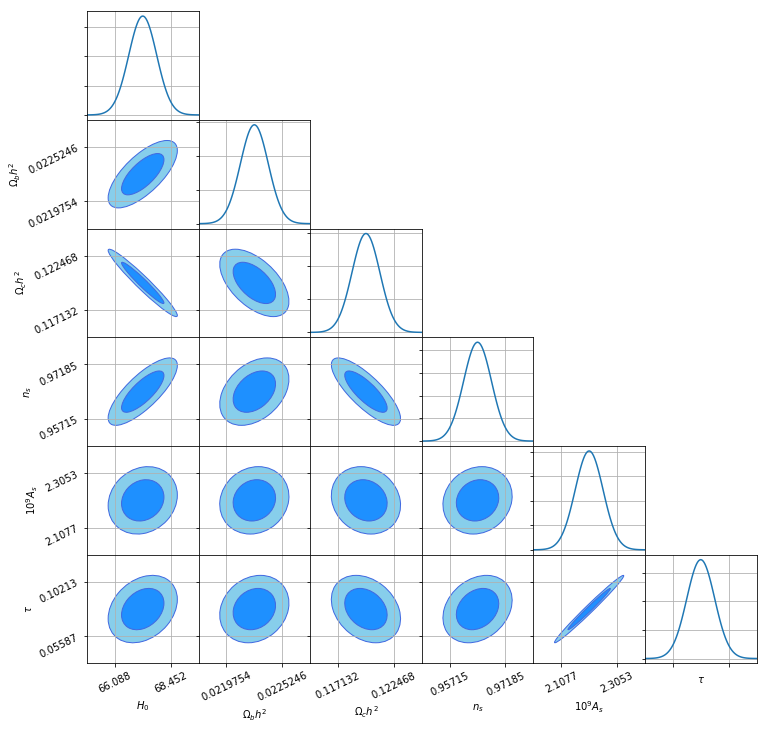

In [13]:
# Triangle Plot (Original code by Nicholas Kern)

fig, axes = plt.subplots(6,6,figsize=(12,12))
fig.subplots_adjust(wspace=0, hspace=0)

bounds = np.sqrt(C.diagonal()) * 4

p_tex = np.array([r'$H_0$', r'$\Omega_bh^2$',r'$\Omega_ch^2$',r'$n_s$',r'$10^9 A_s$',r'$\tau$'])

for i in range(6):
    for j in range(6):
        ax = axes[i, j]
        if j > i:
            ax.axis('off')
            continue
        elif i == j:
            ax.grid(True)
            xarr = np.linspace(theta_best_Planck[i]-bounds[i],theta_best_Planck[i]+bounds[i],101)
            yarr = norm.pdf(xarr, loc=theta_best_Planck[i], scale=np.sqrt(C[i,i]))
            ax.plot(xarr,yarr)
            ax.set_xlim(theta_best_Planck[i]-bounds[i], theta_best_Planck[i]+bounds[i])
            ax.set_xticks([theta_best_Planck[i]-bounds[i]/2, theta_best_Planck[i]+bounds[i]/2])
            ax.set_yticklabels([])
            ax.set_xticklabels([])
        else:
            ax.grid(True)

            CovM = np.array([[C[j,j], C[i,j]],[C[i,j], C[i,i]]])

            eigvec, eigval, u = np.linalg.svd(CovM)

            semimaj = np.sqrt(eigval[0])*2.
            semimin = np.sqrt(eigval[1])*2.

            theta = np.arctan(eigvec[0][1]/eigvec[0][0])

            ell = mpl.patches.Ellipse(xy=[theta_best_Planck[j], theta_best_Planck[i]], width=1.52*semimaj, height=1.52*semimin, angle = theta*180/np.pi, facecolor = 'dodgerblue', edgecolor = 'royalblue', label = '68% confidence')
            ell2 = mpl.patches.Ellipse(xy=[theta_best_Planck[j], theta_best_Planck[i]], width=2.48*semimaj, height=2.48*semimin, angle = theta*180/np.pi, facecolor = 'skyblue', edgecolor = 'royalblue', label = '95% confidence')
            #             fig, ax = plt.subplots(figsize=(7,7))

            ax.add_patch(ell2)
            ax.add_patch(ell)
            
            ax.set_xlim(theta_best_Planck[j]-bounds[j], theta_best_Planck[j]+bounds[j])
            ax.set_ylim(theta_best_Planck[i]-bounds[i], theta_best_Planck[i]+bounds[i])
            ax.set_yticks([theta_best_Planck[i]-bounds[i]/2, theta_best_Planck[i]+bounds[i]/2])
            ax.set_xticks([theta_best_Planck[j]-bounds[j]/2, theta_best_Planck[j]+bounds[j]/2])

            
        if j != 0:
            ax.set_yticklabels([])
        if i != 5:
            ax.set_xticklabels([])
        if j == 0 and i !=0:
            ax.set_ylabel(p_tex[i], fontsize=10)
#             ax.set_yticklabels([np.around(theta_best_Planck[i]-bounds[i]/2, decimals=3), np.around(theta_best_Planck[i]+bounds[i]/2, decimals=3) ])
            [tl.set_rotation(26) for tl in ax.get_yticklabels()]
        if i == 5:
            ax.set_xlabel(p_tex[j], fontsize=10)
#             ax.set_xticklabels([np.around(theta_best_Planck[j]-bounds[j]/2, decimals=3), np.around(theta_best_Planck[j]+bounds[j]/2, decimals=3) ])
            [tl.set_rotation(26) for tl in ax.get_xticklabels()]
    

Now, assume that we have an ideal, zero-noise CMB survey with $N_l = 0$. However, we are still instrinsically limited on the number of independent modes we can measure (there are only (2l+1) of them) - $C_l = \frac{1}{2l+1}\sum_{m=-l}^{l}\langle|a_{lm}|^2\rangle$. This leads that we get an instrinsic error (called "cosmic variance") in our estimate of $C_l$. So we approximate that <br><br> $$ (\sigma_l^{EE})^2 = \frac{2}{(2l+1) \cdot f_{sky} \cdot \Delta l}(D_l^{EE})^2,\ \ (\sigma_l^{TT})^2 = \frac{2}{(2l+1) \cdot f_{sky} \cdot \Delta l}(D_l^{TT})^2,$$ <br> $$ (\sigma_l^{TE})^2 = \frac{2}{(2l+1) \cdot f_{sky} \cdot \Delta l}\frac{(D_l^{TE})^2 + D_l^{TT}D_l^{EE}}{2} $$.
<br><br>

<span style="color:blue"> <i> 3. Repeat Part 1 and 2 assuming $N_l^k = 0$. (How well does a zero-noise CMB survey constrain the cosmologial parameters?) </i></span> <br>

1-d constraints:
H0 = 67.27 +/- 0.17953 
Omega_b h^2 = 0.02225 +/- 0.0000409 
Omega_c h^2 = 0.1198 +/- 0.0004583 
n_s = 0.9645 +/- 0.00147 
10^9A_s =  2.2065 +/- 0.0097867324148 
tau = 0.07900 +/- 0.002423


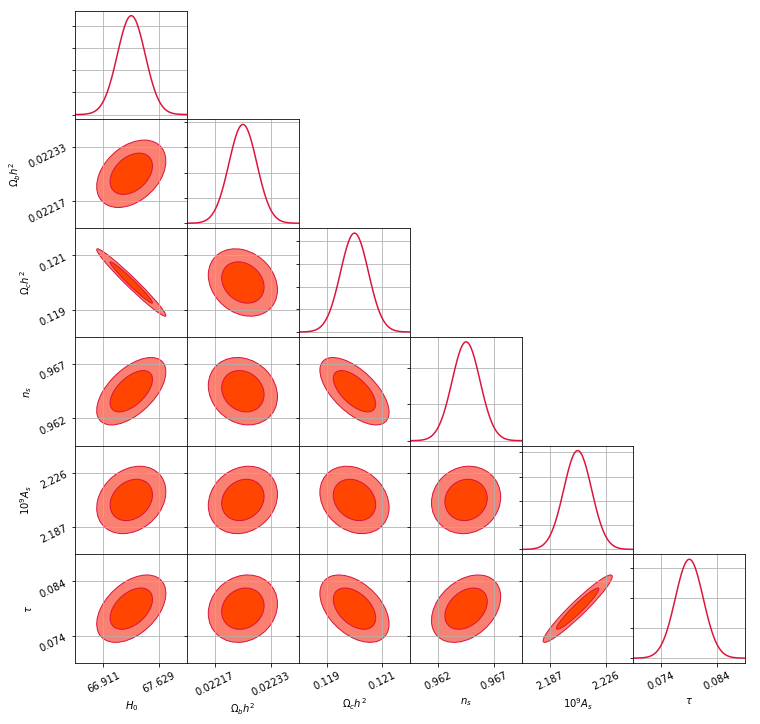

In [16]:
EE_errs = np.zeros(len(ell))
TT_errs = np.zeros(len(ell))
TE_errs = np.zeros(len(ell))
fsky = 1.
for i in range(len(ell)):
    EE_errs[i] = np.sqrt(2./(2.*ell[i]+1.)/fsky*EE_model_Planck[i]**2)
    TT_errs[i] = np.sqrt(2./(2.*ell[i]+1.)/fsky*TT_model_Planck[i]**2)
    TE_errs[i] = np.sqrt(2./(2.*ell[i]+1.)/fsky*(TE_model_Planck[i]**2 + EE_model_Planck[i]*TT_model_Planck[i])/2.)
    if i > 27:
        EE_errs[i] = np.sqrt(1./30.*2./(2.*ell[i]+1.)/fsky*EE_model_Planck[i]**2)
        TT_errs[i] = np.sqrt(1./30.*2./(2.*ell[i]+1.)/fsky*TT_model_Planck[i]**2)
        TE_errs[i] = np.sqrt(1./30.*2./(2.*ell[i]+1.)/fsky*(TE_model_Planck[i]**2 + EE_model_Planck[i]*TT_model_Planck[i])/2.)


errs = np.vstack([EE_errs, TT_errs, TE_errs]).T

vec1 = np.vstack([ deriv_DlEE_theta1, deriv_DlTT_theta1, deriv_DlTE_theta1 ]).T
vec2 = np.vstack([ deriv_DlEE_theta2, deriv_DlTT_theta2, deriv_DlTE_theta2 ]).T
vec3 = np.vstack([ deriv_DlEE_theta3, deriv_DlTT_theta3, deriv_DlTE_theta3 ]).T
vec4 = np.vstack([ deriv_DlEE_theta4, deriv_DlTT_theta4, deriv_DlTE_theta4 ]).T
vec5 = np.vstack([ deriv_DlEE_theta5, deriv_DlTT_theta5, deriv_DlTE_theta5 ]).T
vec6 = np.vstack([ deriv_DlEE_theta6, deriv_DlTT_theta6, deriv_DlTE_theta6 ]).T

temp = []
temp.append(vec1); temp.append(vec2); temp.append(vec3); temp.append(vec4); temp.append(vec5); temp.append(vec6)

temp = np.array(temp)

temp2 = temp/errs[np.newaxis, :, :]

fisher = np.dot(temp2.reshape(6,-1), temp2.reshape(6,-1).T)

C2 = np.linalg.inv(fisher)

print('1-d constraints:')
print('H0 = %.2f +/- %.5f' % (theta_best_Planck[0], np.sqrt(C2.diagonal())[0]), '\nOmega_b h^2 = %.5f +/- %.7f' % (theta_best_Planck[1], np.sqrt(C2.diagonal())[1]), '\nOmega_c h^2 = %.4f +/- %.7f' % (theta_best_Planck[2], np.sqrt(C2.diagonal())[2]), '\nn_s = %.4f +/- %.5f' % (theta_best_Planck[3], np.sqrt(C2.diagonal())[3]), '\n10^9A_s = ', np.around(theta_best_Planck[4], decimals = 12), '+/-', np.around(np.sqrt(C2.diagonal())[4], decimals=13), '\ntau = %.5f +/- %.6f' % (theta_best_Planck[5], np.sqrt(C2.diagonal())[5]))

# Triangle Plot (Original code by Nicholas Kern)

fig, axes = plt.subplots(6,6,figsize=(12,12))
fig.subplots_adjust(wspace=0, hspace=0)

bounds = np.sqrt(C2.diagonal()) * 4

p_tex = np.array([r'$H_0$', r'$\Omega_bh^2$',r'$\Omega_ch^2$',r'$n_s$',r'$10^9A_s$',r'$\tau$'])

for i in range(6):
    for j in range(6):
        ax = axes[i, j]
        if j > i:
            ax.axis('off')
            continue
        elif i == j:
            ax.grid(True)
            xarr = np.linspace(theta_best_Planck[i]-bounds[i],theta_best_Planck[i]+bounds[i],101)
            yarr = norm.pdf(xarr, loc=theta_best_Planck[i], scale=np.sqrt(C2[i,i]))
            ax.plot(xarr,yarr, color = 'crimson')
            ax.set_xlim(theta_best_Planck[i]-bounds[i], theta_best_Planck[i]+bounds[i])
            ax.set_xticks([theta_best_Planck[i]-bounds[i]/2, theta_best_Planck[i]+bounds[i]/2])
            ax.set_yticklabels([])
            ax.set_xticklabels([])
        else:
            ax.grid(True)

            CovM = np.array([[C2[i,i], C2[i,j]],[C2[i,j], C2[j,j]]])

            eigvec, eigval, u = np.linalg.svd(CovM)

            semimaj = np.sqrt(eigval[0])*2.
            semimin = np.sqrt(eigval[1])*2.

            theta = np.arctan(eigvec[0][1]/eigvec[0][0])

            ell = mpl.patches.Ellipse(xy=[theta_best_Planck[i], theta_best_Planck[j]], width=1.52*semimaj, height=1.52*semimin, angle = theta*180/np.pi, facecolor = 'orangered', edgecolor = 'crimson', label = '68% confidence')
            ell2 = mpl.patches.Ellipse(xy=[theta_best_Planck[i], theta_best_Planck[j]], width=2.48*semimaj, height=2.48*semimin, angle = theta*180/np.pi, facecolor = 'salmon', edgecolor = 'crimson', label = '95% confidence')
            #             fig, ax = plt.subplots(figsize=(7,7))

            ax.add_patch(ell2)
            ax.add_patch(ell)
            
            ax.set_ylim(theta_best_Planck[j]-bounds[j], theta_best_Planck[j]+bounds[j])
            ax.set_xlim(theta_best_Planck[i]-bounds[i], theta_best_Planck[i]+bounds[i])
            ax.set_xticks([theta_best_Planck[i]-bounds[i]/2, theta_best_Planck[i]+bounds[i]/2])
            ax.set_yticks([theta_best_Planck[j]-bounds[j]/2, theta_best_Planck[j]+bounds[j]/2])

            
        if j != 0:
            ax.set_yticklabels([])
        if i != 5:
            ax.set_xticklabels([])
        if j == 0 and i != 0:
            ax.set_ylabel(p_tex[i], fontsize=10)
            ax.set_yticklabels([np.around(theta_best_Planck[i]-bounds[i]/2, decimals=3), np.around(theta_best_Planck[i]+bounds[i]/2, decimals=3) ])
            [tl.set_rotation(26) for tl in ax.get_yticklabels()]
        if j == 0 and i == 1:
            ax.set_xlabel(p_tex[j], fontsize=10)
            ax.set_yticklabels([np.around(theta_best_Planck[i]-bounds[i]/2, decimals=5), np.around(theta_best_Planck[i]+bounds[i]/2, decimals=5) ])
            [tl.set_rotation(26) for tl in ax.get_xticklabels()]
        if i == 5 and j != 1:
            ax.set_xlabel(p_tex[j], fontsize=10)
            ax.set_xticklabels([np.around(theta_best_Planck[j]-bounds[j]/2, decimals=3), np.around(theta_best_Planck[j]+bounds[j]/2, decimals=3) ])
            [tl.set_rotation(26) for tl in ax.get_xticklabels()]
        if i == 5 and j == 1:
            ax.set_xlabel(p_tex[j], fontsize=10)
            ax.set_xticklabels([np.around(theta_best_Planck[j]-bounds[j]/2, decimals=5), np.around(theta_best_Planck[j]+bounds[j]/2, decimals=5) ])
            [tl.set_rotation(26) for tl in ax.get_xticklabels()]
    


<span style="color:blue"><i> 4. Combine Part 2 and Part 3 and compare. (First plot your results from Part 2 (1-d and 2-d constraints using the Planck power spectra and noise. Then, plot Part 3 results (assuming zero noise) on top with different colors. Note that your 1-d constrains in Part 3 are more sharply peaked Gaussians (with much smaller variances), so you can scale them so that its peak amplitudes match with your results from Part 2.) </i></span><br>


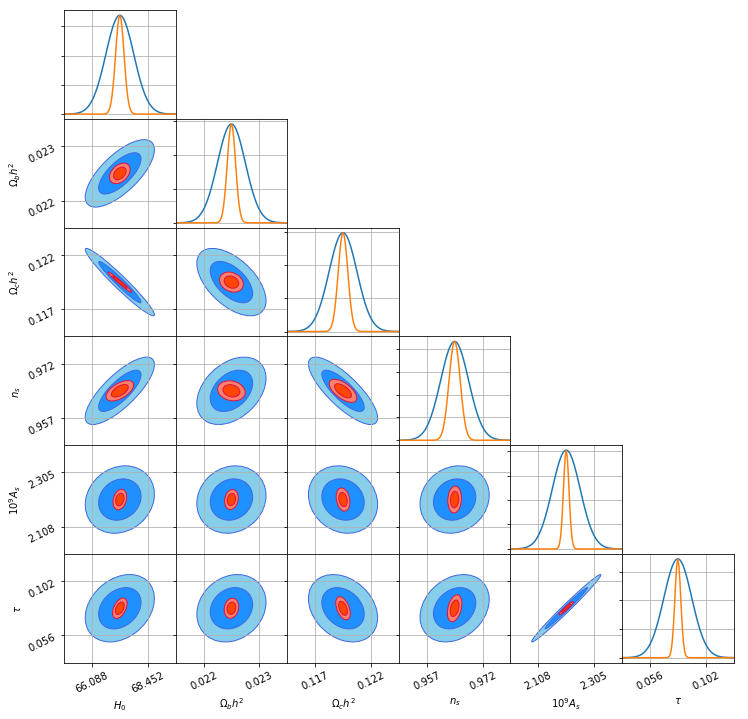

In [17]:
# Triangle Plot (Original code by Nicholas Kern)

fig, axes = plt.subplots(6,6,figsize=(12,12))
fig.subplots_adjust(wspace=0, hspace=0)

bounds = np.sqrt(C.diagonal()) * 4

p_tex = np.array([r'$H_0$', r'$\Omega_bh^2$',r'$\Omega_ch^2$',r'$n_s$',r'$10^9A_s$',r'$\tau$'])

for i in range(6):
    for j in range(6):
        ax = axes[i, j]
        if j > i:
            ax.axis('off')
            continue
        elif i == j:
            ax.grid(True)
            xarr = np.linspace(theta_best_Planck[i]-bounds[i],theta_best_Planck[i]+bounds[i],101)
            yarr = norm.pdf(xarr, loc=theta_best_Planck[i], scale=np.sqrt(C[i,i]))
            ax.plot(xarr,yarr)
            yarr2 = norm.pdf(xarr, loc=theta_best_Planck[i], scale=np.sqrt(C2[i,i]))
            yarr2 = yarr2*max(yarr)/max(yarr2)
            ax.plot(xarr,yarr2)
            ax.set_xlim(theta_best_Planck[i]-bounds[i], theta_best_Planck[i]+bounds[i])
            ax.set_xticks([theta_best_Planck[i]-bounds[i]/2, theta_best_Planck[i]+bounds[i]/2])
            ax.set_yticklabels([])
            ax.set_xticklabels([])
        else:
            ax.grid(True)

            CovM = np.array([[C[i,i], C[i,j]],[C[i,j], C[j,j]]])

            eigvec, eigval, u = np.linalg.svd(CovM)

            semimaj = np.sqrt(eigval[0])*2.
            semimin = np.sqrt(eigval[1])*2.

            theta = np.arctan(eigvec[0][1]/eigvec[0][0])

            ell = mpl.patches.Ellipse(xy=[theta_best_Planck[i], theta_best_Planck[j]], width=1.52*semimaj, height=1.52*semimin, angle = theta*180/np.pi, facecolor = 'dodgerblue', edgecolor = 'royalblue', label = '68% confidence')
            ell2 = mpl.patches.Ellipse(xy=[theta_best_Planck[i], theta_best_Planck[j]], width=2.48*semimaj, height=2.48*semimin, angle = theta*180/np.pi, facecolor = 'skyblue', edgecolor = 'royalblue', label = '95% confidence')
            #             fig, ax = plt.subplots(figsize=(7,7))

            ax.add_patch(ell2)
            ax.add_patch(ell)
            
            CovM2 = np.array([[C2[i,i], C2[i,j]],[C2[i,j], C2[j,j]]])

            eigvec, eigval, u = np.linalg.svd(CovM2)

            semimaj = np.sqrt(eigval[0])*2.
            semimin = np.sqrt(eigval[1])*2.

            theta = np.arctan(eigvec[0][1]/eigvec[0][0])

            ell = mpl.patches.Ellipse(xy=[theta_best_Planck[i], theta_best_Planck[j]], width=1.52*semimaj, height=1.52*semimin, angle = theta*180/np.pi, facecolor = 'orangered', edgecolor = 'crimson', label = '68% confidence')
            ell2 = mpl.patches.Ellipse(xy=[theta_best_Planck[i], theta_best_Planck[j]], width=2.48*semimaj, height=2.48*semimin, angle = theta*180/np.pi, facecolor = 'salmon', edgecolor = 'crimson', label = '95% confidence')
            #             fig, ax = plt.subplots(figsize=(7,7))

            ax.add_patch(ell2)
            ax.add_patch(ell)
            
            ax.set_ylim(theta_best_Planck[j]-bounds[j], theta_best_Planck[j]+bounds[j])
            ax.set_xlim(theta_best_Planck[i]-bounds[i], theta_best_Planck[i]+bounds[i])
            ax.set_xticks([theta_best_Planck[i]-bounds[i]/2, theta_best_Planck[i]+bounds[i]/2])
            ax.set_yticks([theta_best_Planck[j]-bounds[j]/2, theta_best_Planck[j]+bounds[j]/2])

            
        if j != 0:
            ax.set_yticklabels([])
        if i != 5:
            ax.set_xticklabels([])
        if j == 0 and i !=0:
            ax.set_ylabel(p_tex[i], fontsize=10)
            ax.set_yticklabels([np.around(theta_best_Planck[i]-bounds[i]/2, decimals=3), np.around(theta_best_Planck[i]+bounds[i]/2, decimals=3) ])
            [tl.set_rotation(26) for tl in ax.get_yticklabels()]
        if i == 5:
            ax.set_xlabel(p_tex[j], fontsize=10)
            ax.set_xticklabels([np.around(theta_best_Planck[j]-bounds[j]/2, decimals=3), np.around(theta_best_Planck[j]+bounds[j]/2, decimals=3) ])
            [tl.set_rotation(26) for tl in ax.get_xticklabels()]
    


<span style="color:blue"><i> 5. Starting from the best-fit values from the Planck 2015 paper, you constrained six cosmological parameters assuming that you have a zero-noise future CMB survey. Compare your results with Table 3 and Figure 6 in https://arxiv.org/pdf/1502.01589v3.pdf. </i></span><br>


<span style="color:blue"> <i> Answer: </i></span><br><br>
So far we tried three different cases:<br><br>
(1) Problem1-Part4: using the EE spectra only<br>
(2) Problem2-Part2: using EE+TT+TE assuming the Planck noise<br>
(3) Problem2-Part3: using EE+TT+TE assuming zero CMB noise<br><br>
As expected, we find (1) gives the worst constraints on the cosmological parameters because it only includes $D_l^{EE}$. This is comparable to the green ellipses in Fig. 6 from the Planck 2015 paper. Generally, the best-fit values from (1) is within 1-$\sigma$ from the values in the Planck paper. (2) is comparable to the blue ellipses in Fig. 6, and (3) gives the best (i.e. tightest) constraints on the parameters.

***

## To Submit
Execute the following cell to submit.
If you make changes, execute the cell again to resubmit the final copy of the notebook, they do not get updated automatically.<br>
__We recommend that all the above cells should be executed (their output visible) in the notebook at the time of submission.__ <br>
Only the final submission before the deadline will be graded. 


In [ ]:
_ = ok.submit()